# Ground water level prediction

## Mst Nazneen Aktar
## Md. Abdullah-Al Mamun

# Exploratory data analysis

In [7]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
NDVI_df= pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\Final Dataset_GWL\Final_NDVI_Data.xlsx')  # Specify the header row number
NDVI_df

,Year,Month,NDVI_Rangpur,NDVI_Sayedpur,NDVI_Dinajpur
0,1993,1,0.1763,0.1948,0.1638
1,1993,2,0.1041,0.1579,0.1388
2,1993,3,0.1847,0.1459,0.1668
3,1993,4,0.1085,0.1365,0.1465
4,1993,5,0.1219,0.1872,0.1435
...,...,...,...,...,...
295,2017,8,0.1597,0.1596,0.2086
296,2017,9,0.2281,0.2759,0.2259
297,2017,10,0.1576,0.1674,0.2012
298,2017,11,0.2403,0.2338,0.2210


In [11]:
info = NDVI_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           300 non-null    int64  
 1   Month          300 non-null    int64  
 2   NDVI_Rangpur   300 non-null    float64
 3   NDVI_Sayedpur  300 non-null    float64
 4   NDVI_Dinajpur  300 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 11.8 KB


In [13]:
description_data = round(NDVI_df.iloc[:, 2:].describe(), 2)
description_data

,NDVI_Rangpur,NDVI_Sayedpur,NDVI_Dinajpur
count,300.00,300.00,300.00
mean,0.20,0.17,0.22
std,0.07,0.05,0.08
min,0.04,0.01,0.06
25%,0.14,0.14,0.15
50%,0.18,0.17,0.20
75%,0.25,0.20,0.27
max,0.41,0.35,0.45


In [14]:
# Checking the missing values in each coulmn
missing_values = NDVI_df.isnull().sum()
missing_values

Year             0
Month            0
NDVI_Rangpur     0
NDVI_Sayedpur    0
NDVI_Dinajpur    0
dtype: int64

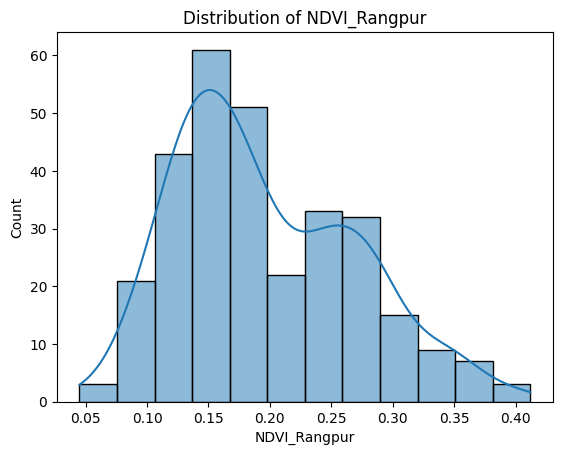

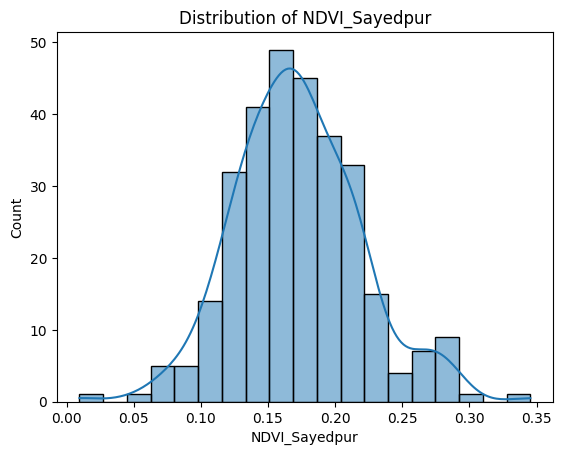

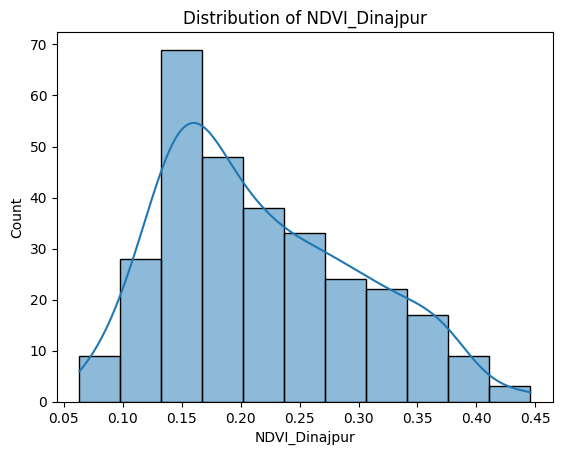

In [16]:
def plot_distribution(NDVI_df):
    for column in NDVI_df.columns:
        sns.histplot(NDVI_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

plot_distribution( NDVI_df.iloc[:, 2:])

In [7]:
correlation_matrix = NDVI_df.corr()
correlation_matrix

,Year,Month,NDVI_Rangpur,NDVI_Sayedpur,NDVI_Dinajpur
Year,1.000000e+00,2.815634e-15,0.092137,0.065680,0.043279
Month,2.815634e-15,1.000000e+00,0.164857,0.320976,0.033103
NDVI_Rangpur,9.213686e-02,1.648573e-01,1.000000,0.469461,0.754604
NDVI_Sayedpur,6.567954e-02,3.209761e-01,0.469461,1.000000,0.403813
NDVI_Dinajpur,4.327873e-02,3.310272e-02,0.754604,0.403813,1.000000


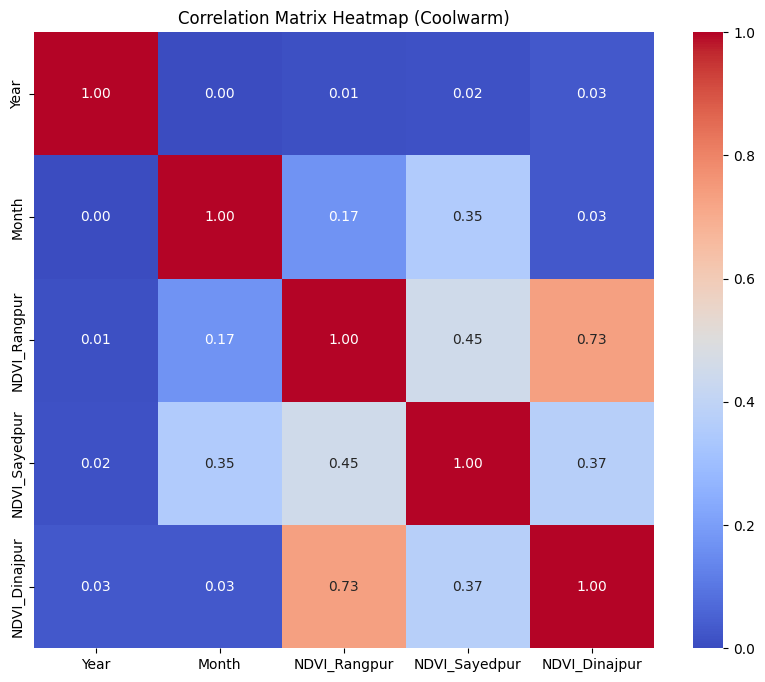

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming GWL_df is your DataFrame
correlation_matrix = NDVI_df.corr()

# Create a heatmap with the "coolwarm" color palette
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap (Coolwarm)")
plt.show()


D:\Jupyter\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


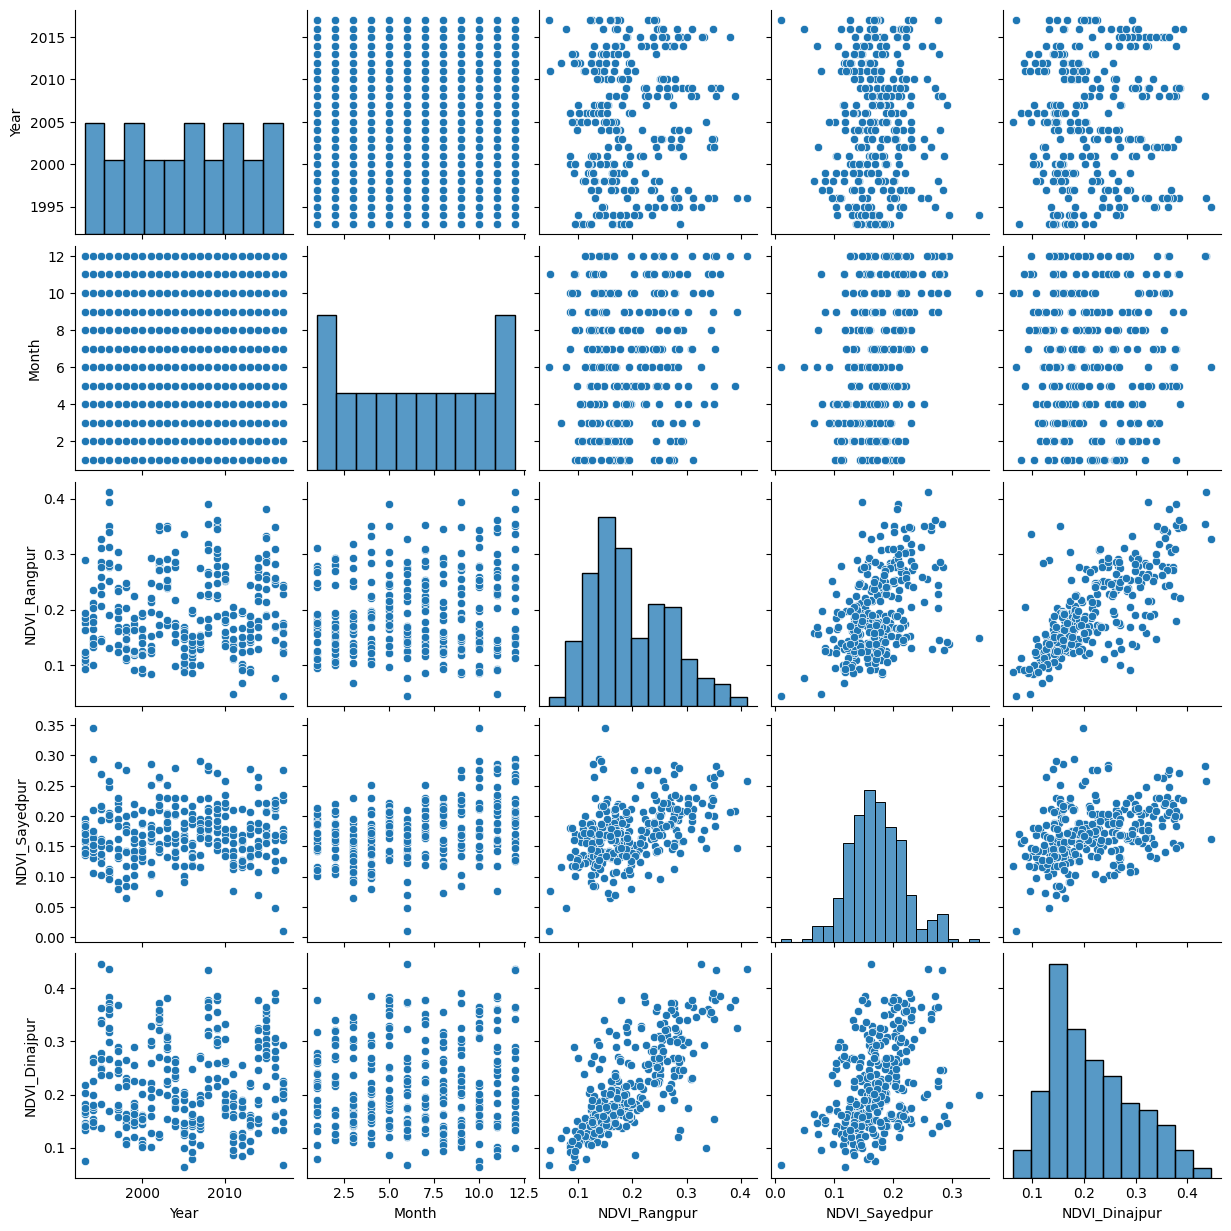

In [19]:
sns.pairplot(NDVI_df)
plt.show()

In [20]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(NDVI_df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [21]:
checker.check_missing_values()

No missing values found in DataFrame


In [22]:
def plot_boxplot_with_outliers(data):
    plt.figure(figsize=(14, 8))
    numeric_columns = data.select_dtypes(include=np.number).columns
    bp = plt.boxplot(data[numeric_columns].values, showfliers=False)
    plt.title('Boxplot')
    plt.ylabel('Values')

    for j, column in enumerate(numeric_columns, 1):
        column_values = data[column].values
        q1 = np.nanpercentile(column_values, 25)
        q3 = np.nanpercentile(column_values, 75)
        iqr = q3 - q1
        outlier_threshold = 1.5 * iqr
        column_outliers = column_values[((column_values < q1 - outlier_threshold) | (column_values > q3 + outlier_threshold))]
        for outlier in column_outliers:
            plt.plot(j, outlier, 'ro', label='Outlier')

    plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation='vertical')  
    plt.tight_layout() 
    plt.show()


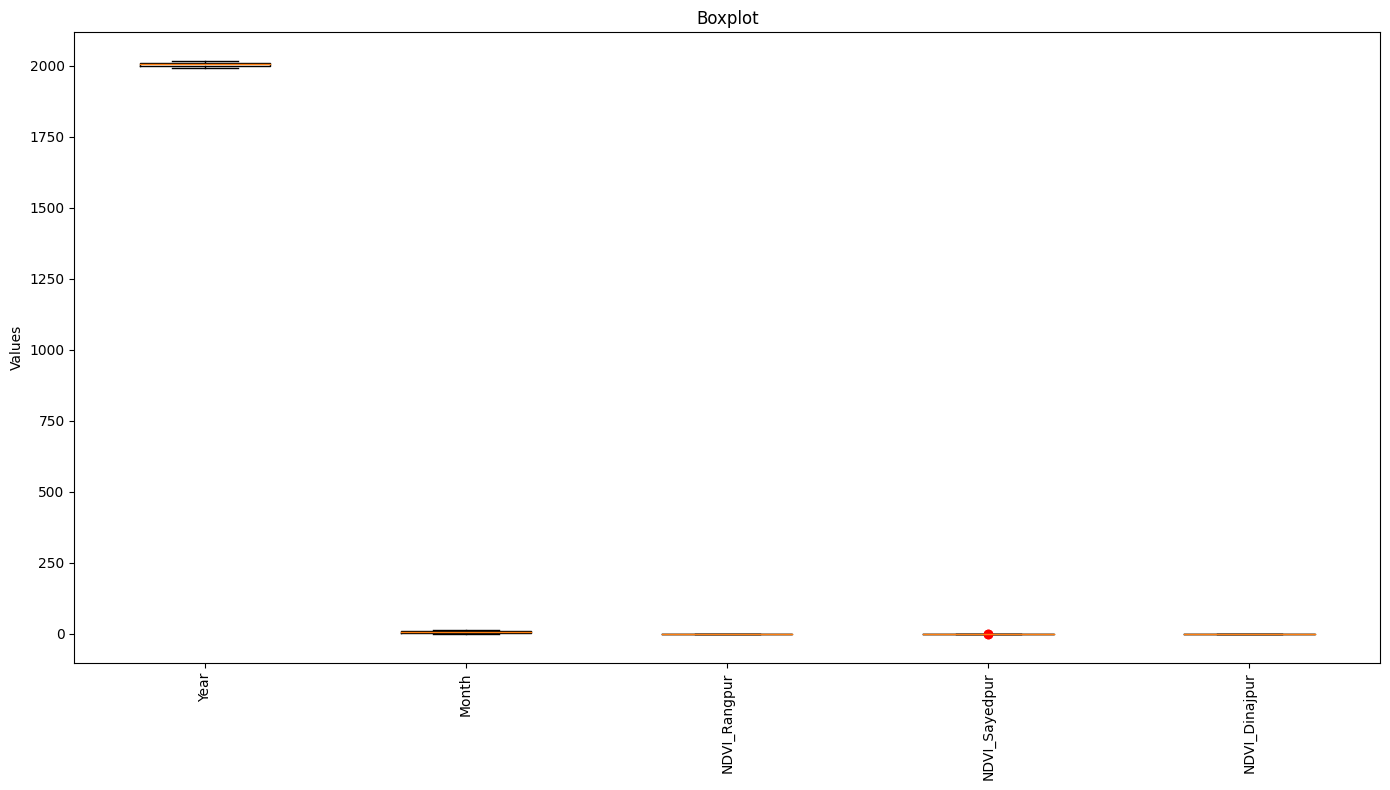

In [23]:
plot_boxplot_with_outliers(NDVI_df)

In [24]:
import warnings
from scipy import stats


def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers


In [25]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')


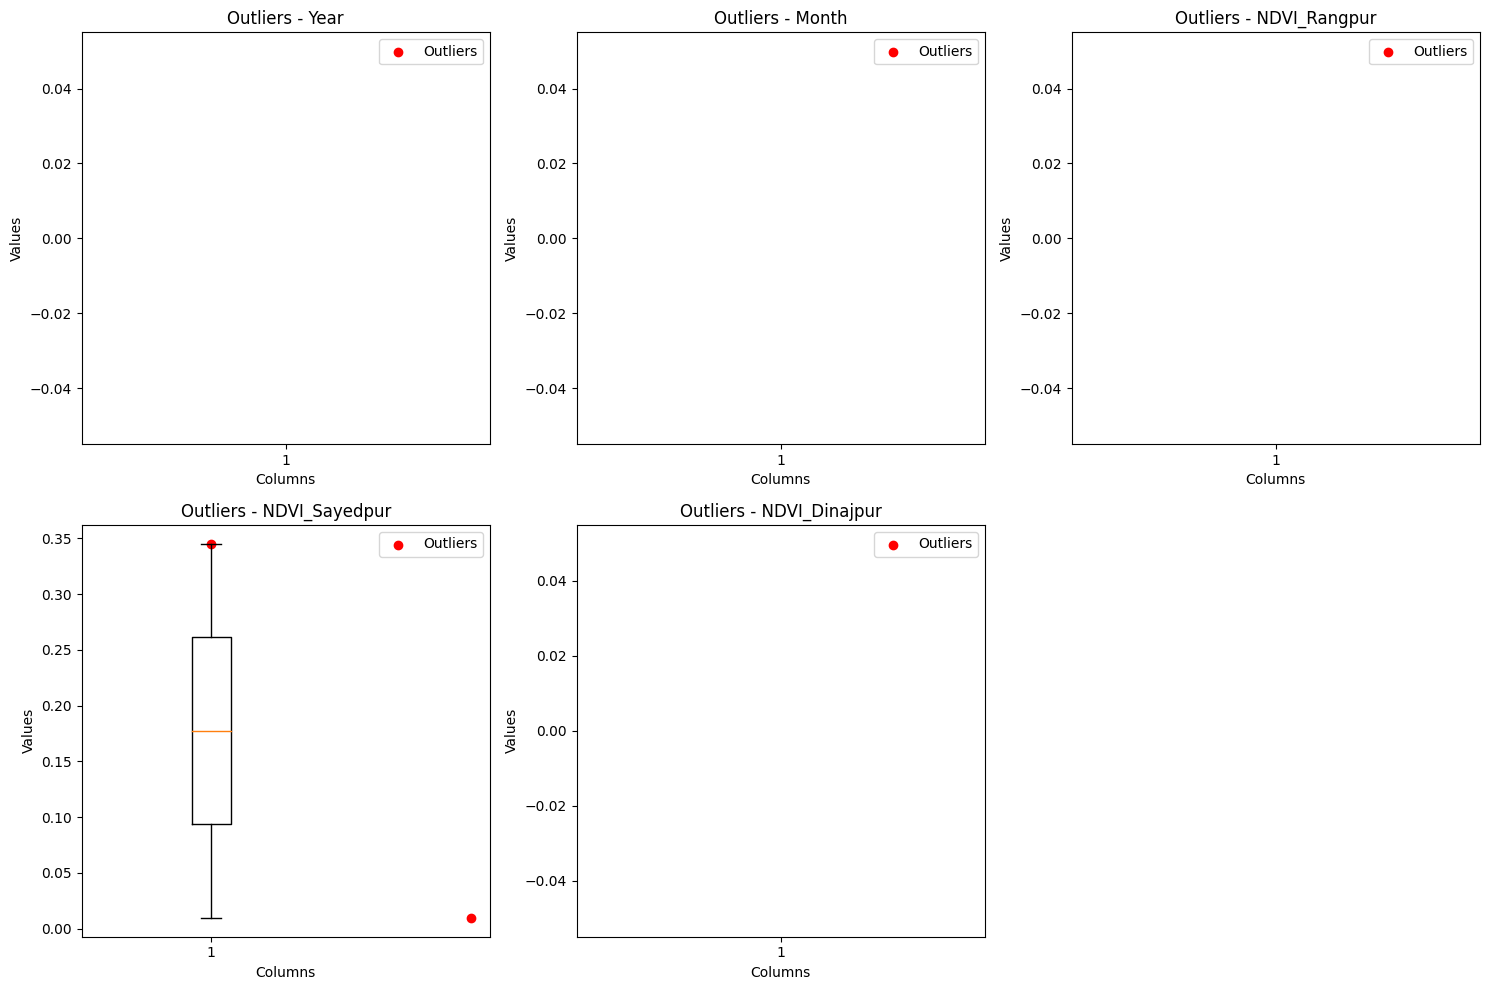

Number of total outliers: 2


In [26]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = NDVI_df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = NDVI_df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# Print the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

In [27]:
from plotting_library import*

# Checking if transformation is needed
check_transformation_needed(NDVI_df)

Transformation recommended for column: Year
Transformation recommended for column: Month
Transformation recommended for column: NDVI_Rangpur
Transformation recommended for column: NDVI_Sayedpur
Transformation recommended for column: NDVI_Dinajpur
